<a href="https://colab.research.google.com/github/mobraine/Brain-Inspired-AI/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#To ensure reproducibility
np.random.seed(11)

In [ ]:
# This code defines the inputs and outputs for our four problems, using a task object

class task(object):
    """
    The task object stores the inputs and outputs for a given problem in order to keep things
    consistent between tasks.
    """

    # The initialization function, inputs and outputs must be provided here
    def __init__(self,inputs,outputs):
        """
        Provide a set of inputs and outputs that define the task. Both the inputs and the outputs
        must be a 2D tuple, organized by cases (e.g. data points) on the first dimension, and units
        on the second dimension, e.g. for XOR the first dimension will be 4 in length for both, the
        inputs will have length 2 for the second dimension, and the outputs length 1. i.e. there are
        4 cases where each case should have 2 input units
        """

        # store the inputs and outputs as numpy arrays
        self.inputs  = np.array(inputs)
        self.outputs = np.array(outputs)

        # double check the dimensions are right
        assert self.inputs.shape[0] == self.outputs.shape[0], "Number of cases in input and output not equal."


    # A function to determine the number of cases
    def ncases(self):
        return self.inputs.shape[0]

    # A function to determine the number of input units
    def ninputs(self):
        return self.inputs.shape[1]

    # A function to determine the number of output units
    def noutputs(self):
        return self.outputs.shape[1]

# The AND Problem
inputs  = ((0,0),(0,1),(1,0),(1,1))
outputs = ((0,),(0,),(0,),(1,))
andtask = task(inputs,outputs)

# The XOR Problem
inputs  = ((0,0),(0,1),(1,0),(1,1))
outputs = ((0,),(1,),(1,),(0,))
xortask = task(inputs,outputs)

# The Encoding Problem
inputs  = ((1,0,0,0,0,0,0,0),(0,1,0,0,0,0,0,0),(0,0,1,0,0,0,0,0),(0,0,0,1,0,0,0,0),
           (0,0,0,0,1,0,0,0),(0,0,0,0,0,1,0,0),(0,0,0,0,0,0,1,0),(0,0,0,0,0,0,0,1))
outputs = ((1,0,0,0,0,0,0,0),(0,1,0,0,0,0,0,0),(0,0,1,0,0,0,0,0),(0,0,0,1,0,0,0,0),
           (0,0,0,0,1,0,0,0),(0,0,0,0,0,1,0,0),(0,0,0,0,0,0,1,0),(0,0,0,0,0,0,0,1))
enctask = task(inputs,outputs)

# The Negation Problem
inputs  = ((0,0,0,0),(0,0,0,1),(0,0,1,0),(0,0,1,1),(0,1,0,0),(0,1,0,1),(0,1,1,0),(0,1,1,1),
           (1,0,0,0),(1,0,0,1),(1,0,1,0),(1,0,1,1),(1,1,0,0),(1,1,0,1),(1,1,1,0),(1,1,1,1))
outputs = ((0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1),
           (1,1,1),(1,1,0),(1,0,1),(1,0,0),(0,1,1),(0,1,0),(0,0,1),(0,0,0))
negtask = task(inputs,outputs)

In [ ]:
class mlp(object):
    """
    Define a class for a multilayer perceptron here (just one hidden layer).
    You must also define the functions below, and use the arguments provided,
    but you can add additional arguments if you wish.
    Also, note that you are welcome to write your own helper functions.
    Reminder: you should use numpy functions for vector and matrix operations,
    and you have to calculate your own gradients for backprop. No autograd!
    """

    # The initialization function for the mlp
    def __init__(self, task, nhid):
        """
        Comment!!!! Your marks depend on it!

        Note: You must use the arguments here for the task number of hidden units.
        """

        # Initialize the synaptic weights randomly using a standard normal distribution


        self.inputs = self.add_bias(task.inputs) # the inputs after adding a bias term for each case in the inputs, shape=(task.ncases, task.ninputs + 1)
        self.truths = task.outputs # the ground truth to be compared with
        self.original_inputs = task.inputs # the original inputs for labeling in the plots

        self.hidden_layer = [] # a dummy hidden layer, for plotting

        self.in_hid_weights = [np.random.standard_normal(size=(nhid,task.ninputs()+1))] # maintain a list of matrix of shape (number of hidden units, number of input units)

        # self.hid_out_weights = [np.random.standard_normal(size=(task.noutputs(),nhid))]
        self.hid_out_weights = [np.random.standard_normal(size=(task.noutputs(),nhid+1))] # same as above
        self.loss = [] # a dummy loss

        self.nhid = nhid # recording number of hidden units for plotting

    # HELPER 1 #
    def add_bias (self, inputs):
      """
      The function to add a bias term of 1 for every single case in inputs, return modified
      """

      modified_inputs = []
      for case in inputs:
        modified_inputs.append(np.append(case,1))
      return np.array(modified_inputs)

    # HELPER 2 #
    def forward (self, input):
      """
      The function to do a forward pass, taking a single input case to hidden units then to outputs and return the outputs.
      use one case at a time.
      """

      # net_h = (np.matmul(self.in_hid_weights[-1], np.transpose(input))) # now the latest hidden_layer should have shape (nhid,)
      net_h = (np.matmul(self.in_hid_weights[-1], input))
      sig_hidden_activation = 1/(1 + np.exp(-net_h)) # use sigmoid as activation function for hidden layer activities, o_h
      sig_hidden_activation = np.append(sig_hidden_activation,1)
      self.hidden_layer.append(sig_hidden_activation)
      # net_y = np.transpose(np.matmul(self.hid_out_weights[-1], sig_hidden_activation)) # now outputs should have shape (task.noutputs,)
      net_y = np.matmul(self.hid_out_weights[-1], sig_hidden_activation) # now outputs should have shape (task.noutputs,)
      sig_output = 1/(1 + np.exp(-net_y)) # use sigmoid as activation function for output layer activities, o_y

      return sig_output#, sig_hidden_activation

    # HELPER 3 #
    def backward (self, input, pred, truth):
      """
      back propagate error to update self.in_hid_weights and self.hid_out_weights, and recording new weights, for one case only
      """

      error = pred - truth  # o_y - t, shape = (noutputs,)

      lr_rate = 0.5

      # weight update
      delta_in_hid_weights = np.zeros(np.shape(self.in_hid_weights[-1]))
      for i in range(delta_in_hid_weights.shape[0]): # nhid
        for j in range(delta_in_hid_weights.shape[1]): # ninputs + 1
          sum_i = np.sum(np.multiply(np.multiply(np.multiply(error, pred),(1-pred)),np.transpose(self.hid_out_weights[-1][:,i])))
          delta_in_hid_weights[i][j] = sum_i * self.hidden_layer[-1][i] * (1-self.hidden_layer[-1][i]) * input[j] * lr_rate
      self.in_hid_weights.append(self.in_hid_weights[-1] - delta_in_hid_weights)


      # delta_hid_out_weights = np.matmul(np.multiply(np.multiply(error,pred),(1-pred)),self.hidden_layer[-1]) # matrix notation
      delta_hid_out_weights = np.zeros(np.shape(self.hid_out_weights[-1]))
      for i in range(len(error)): # noutputs
        for j in range(delta_hid_out_weights.shape[1]): # nhid
          delta_hid_out_weights[i][j] = error[i] * (pred[i] * (1-pred[i])) * self.hidden_layer[-1][j] * lr_rate
      self.hid_out_weights.append(self.hid_out_weights[-1] - delta_hid_out_weights)


      return error

    # The function for training the network for one epoch (i.e. one pass through the data)
    def train_one_epoch(self):
        """
        Train the network on the task provided at initialization for one epoch. This
        function should be called by the train() function.

        Comment!!!! Your marks depend on it!
        """
        errors = []
        # hidden_acts = []
        for input,truth in zip(self.inputs, self.truths):
          pred = self.forward(input)
          errors.append(self.backward(input, pred, truth))
          # hidden_acts.append(hidden_act)
        # print(errors)
        current_loss = np.sum(np.square(errors)) / 2            # the overall loss over 1 epoch
        self.loss.append(current_loss) # record loss
        # self.hidden_layer.append(np.mean(hidden_acts,axis=1))

    # The function for training the network
    def train(self):
        """
        Train the network on the task provided at initialization.

        Comment!!!! Your marks depend on it!
        """
        for i in range(5000):
          self.train_one_epoch()
        print("Training done.")


    # The function for plotting the loss after training
    def plot_loss(self):
        """
        Plot the loss over epochs.

        Comment!!!! Your marks depend on it!
        """
        plt.title("Training Loss " + str(self.nhid) + ' hidden units')
        plt.plot(self.loss)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    # The function for plotting the hidden units weights
    def plot_weights(self):
        """
        Plot the hidden unit weights.

        Comment!!!! Your marks depend on it!
        """
        ih_weights = np.array(self.in_hid_weights[:len(self.in_hid_weights)-1])
        ho_weights = np.array(self.hid_out_weights[:len(self.hid_out_weights)-1])

        indices = np.arange(len(self.truths)) # if we have 4 samples, then indices = [0,1,2,3]
        for index in indices:
            sample_weights_indices = np.arange(index,index+ih_weights.shape[0],len(self.truths))
            sample_ih_weights = ih_weights[sample_weights_indices,:,:]
            sample_ho_weights = ho_weights[sample_weights_indices,:,:]

            if 1 in ih_weights.shape:
              figure, axis = plt.subplots(1,2)
              axis[0].set_title("W_h" + str(self.original_inputs[index]))
              axis[0].plot(np.squeeze(sample_ih_weights),)
              axis[1].set_title('W_y' + str(self.original_inputs[index]))
              axis[1].plot(np.squeeze(sample_ho_weights))
              plt.show()
            else:
              figure, axis = plt.subplots(ih_weights.shape[1],2)
              for i in range(ih_weights.shape[1]):
                axis[i][0].set_title("W_h_"+str(i)+str(self.original_inputs[index]))
                axis[i][0].plot(sample_ih_weights[:,i,:])
                axis[i][1].set_title('W_y_'+str(i)+str(self.original_inputs[index]))
                axis[i][1].plot(sample_ho_weights[:,:,i])
              plt.show()


        # if 1 in ih_weights.shape:
        #   figure, axis = plt.subplots(1,2)
        #   axis[0].set_title("W_h")
        #   axis[0].plot(np.squeeze(ih_weights))
        #   axis[1].set_title('W_y')
        #   axis[1].plot(np.squeeze(ho_weights))
        #   plt.show()
        # else:
        #   figure, axis = plt.subplots(ih_weights.shape[1],2)
        #   for i in range(ih_weights.shape[1]):
        #     axis[i][0].set_title("W_h_"+str(i))
        #     axis[i][0].plot(ih_weights[:,i,:])
        #     axis[i][1].set_title('W_y_'+str(i))
        #     axis[i][1].plot(ho_weights[:,:,i])
        #   plt.show()

    # The function for plotting the hidden unit activity
    def plot_activity(self):
        """
        Plot the activity of the hidden units for the given task.

        Comment!!!! Your marks depend on it!
        """

        for i in range(self.nhid):
          plt.figure()
          plt.title('Hidden unit ' + str(i) + ' activity')
          hidden_layer_i = np.array(self.hidden_layer)[:,i]
          indices = np.arange(len(self.truths)) # if we have 4 samples, then indices = [0,1,2,3]
          for index in indices:
            sample_hidden_activity_indices = np.arange(index,index+len(hidden_layer_i),len(self.truths))
            sample_hidden_activity = hidden_layer_i[sample_hidden_activity_indices]
            plt.plot(sample_hidden_activity, label=self.original_inputs[index])
            plt.legend()
          plt.show()

Training done.


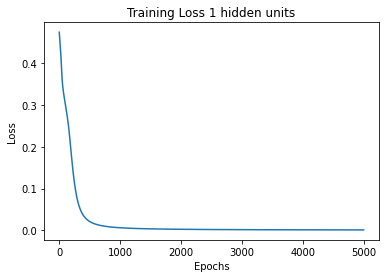

In [ ]:
# Part 1: Create a MLP and train it on the AND task, plot the loss, hidden unit weights, and hidden activity
andmlp = mlp(andtask,1)
andmlp.train()
andmlp.plot_loss()

Training done.


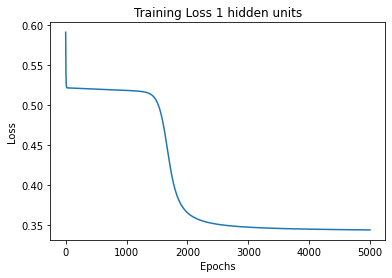

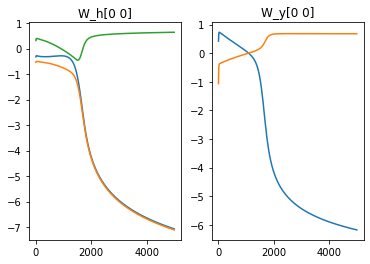

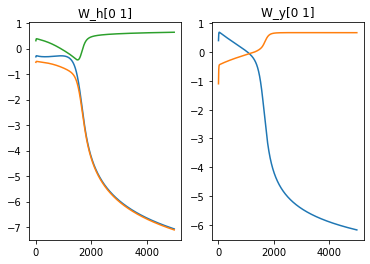

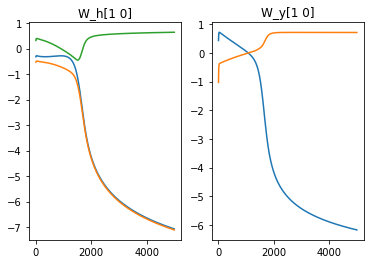

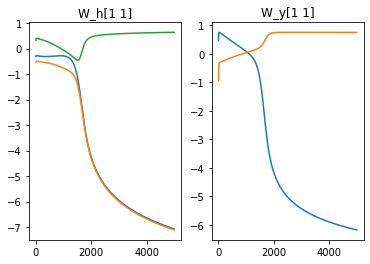

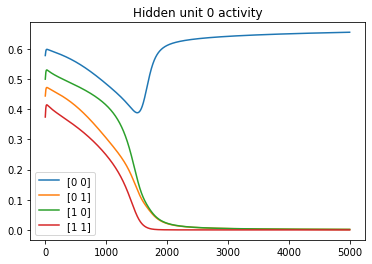

In [ ]:
# Part 2: Create a MLP and train it on the XOR task, plot the loss, hidden unit weights, and hidden activity
xormlp = mlp(xortask,1)
xormlp.train()
xormlp.plot_loss()
xormlp.plot_weights()
xormlp.plot_activity()

Training done.


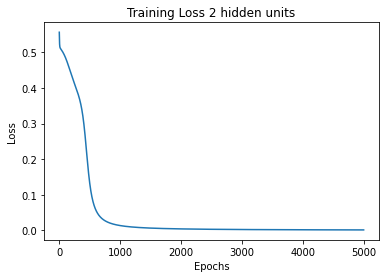

In [ ]:
# XOR with two hidden units.
xormlp = mlp(xortask,2)
xormlp.train()
xormlp.plot_loss()

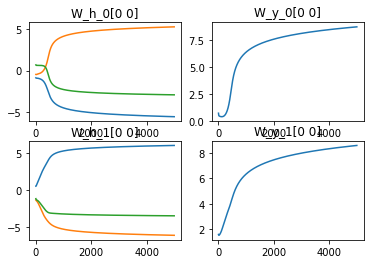

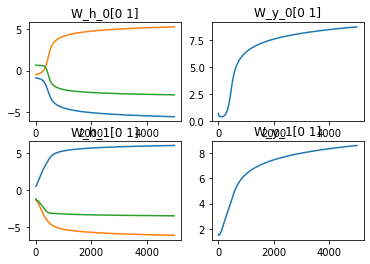

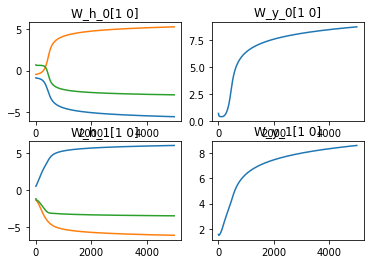

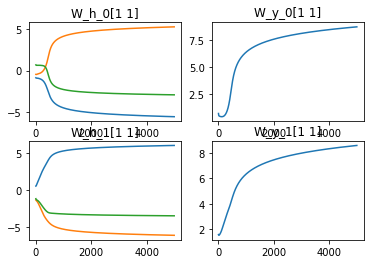

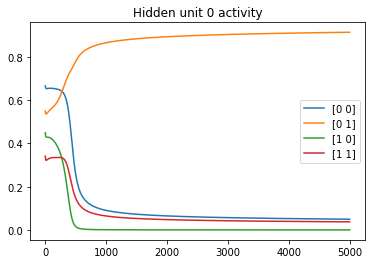

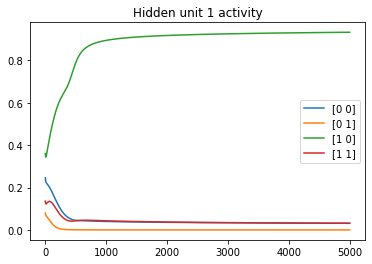

In [ ]:
xormlp.plot_weights()
xormlp.plot_activity()

In [ ]:
print(np.array(xormlp.hidden_layer).shape)
print(np.array(xormlp.in_hid_weights).shape)
print(np.array(xormlp.hid_out_weights).shape)

(20000, 3)
(20001, 2, 3)
(20001, 1, 3)


Training done.


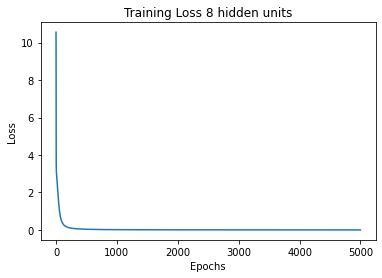

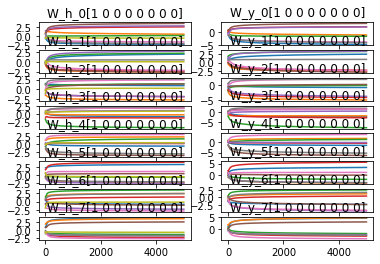

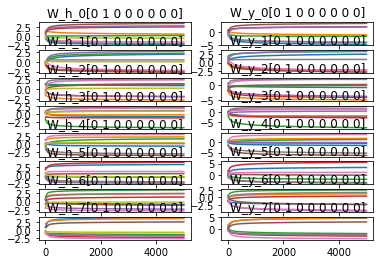

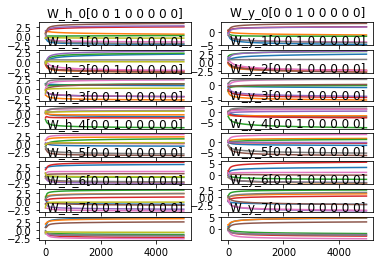

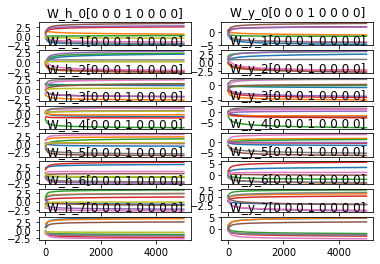

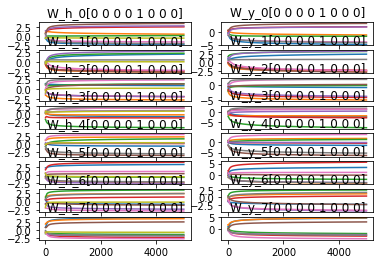

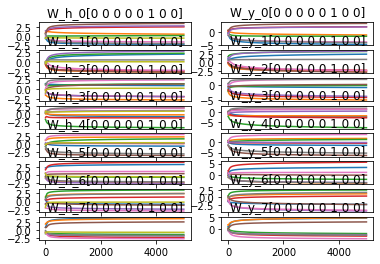

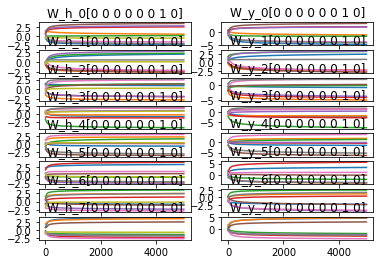

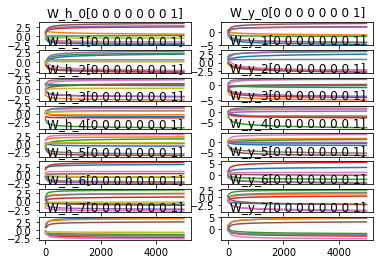

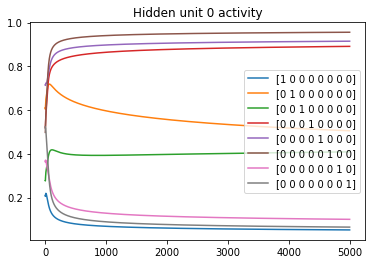

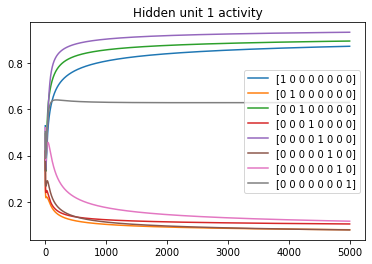

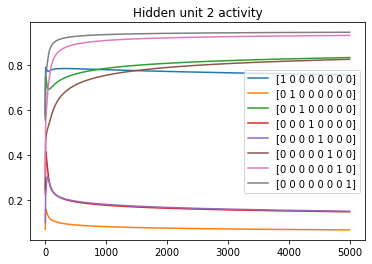

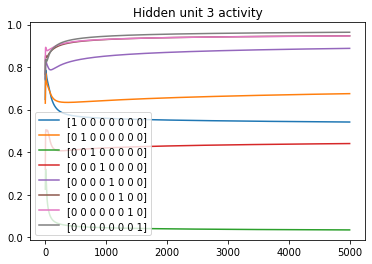

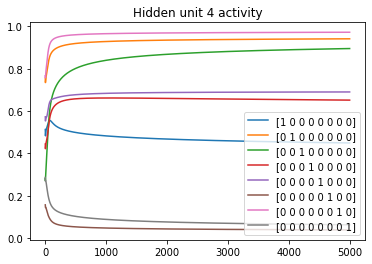

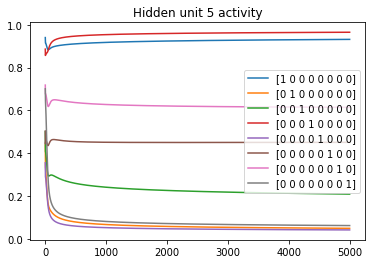

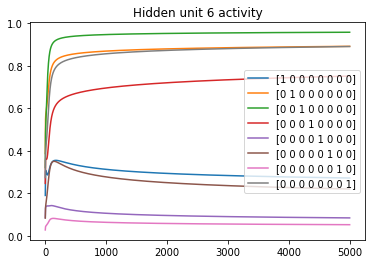

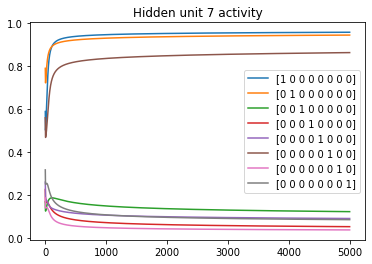

In [ ]:
# Part 3: Create a MLP and train it on the Encoding task, plot the loss, hidden unit weights, and hidden activity
encmlp = mlp(enctask,8)
encmlp.train()
encmlp.plot_loss()
encmlp.plot_weights()
encmlp.plot_activity()

In [ ]:
print(np.array(encmlp.in_hid_weights).shape)

(40001, 8, 9)


Training done.


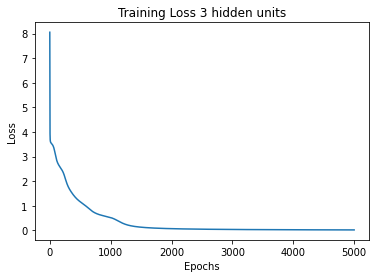

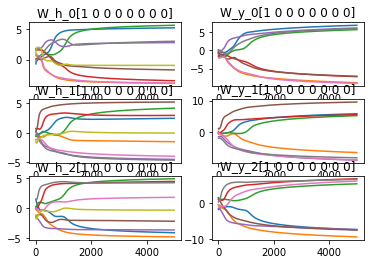

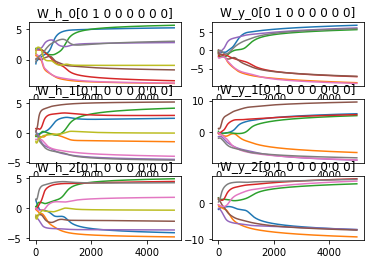

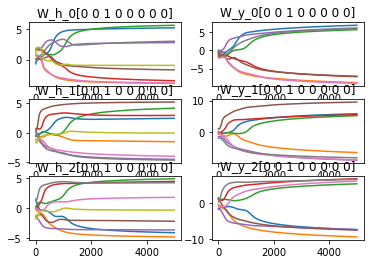

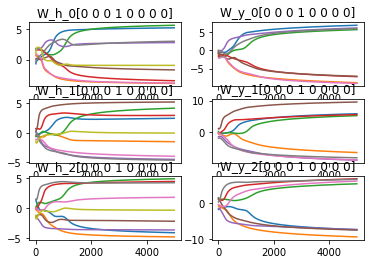

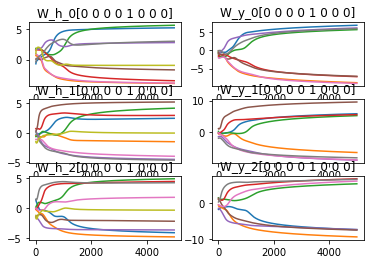

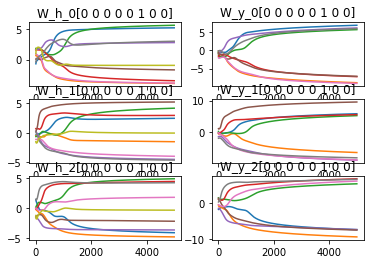

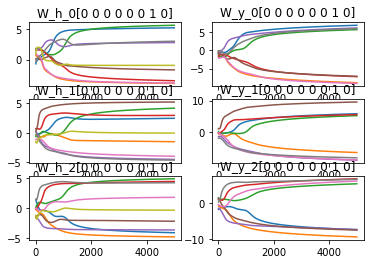

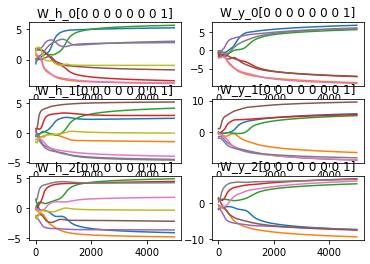

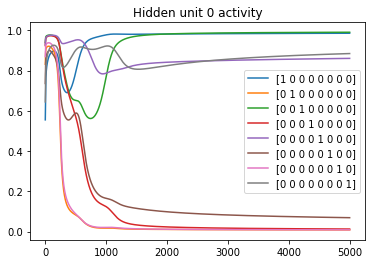

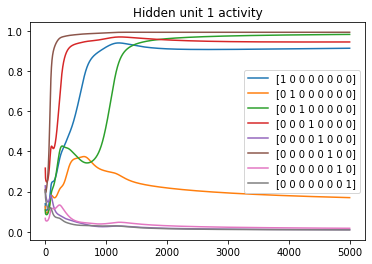

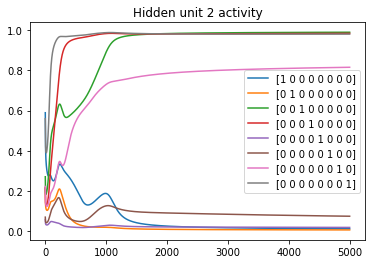

In [ ]:
encmlp = mlp(enctask,3)
encmlp.train()
encmlp.plot_loss()
encmlp.plot_weights()
encmlp.plot_activity()

Training done.


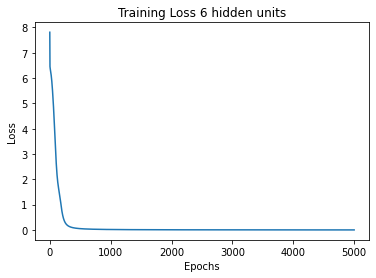

In [ ]:
# Part 4: Create a MLP and train it on the Negation task, plot the loss, hidden unit weights, and hidden activity
negmlp = mlp(negtask,6)
negmlp.train()
negmlp.plot_loss()

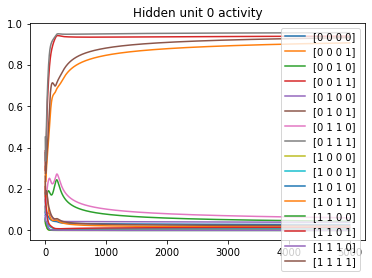

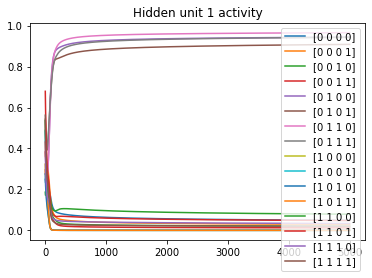

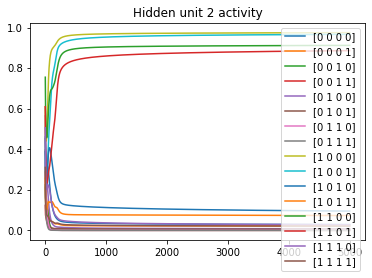

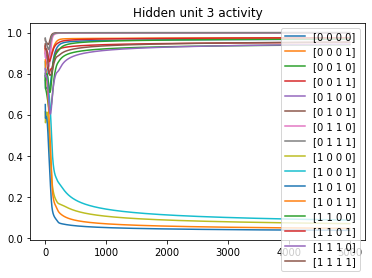

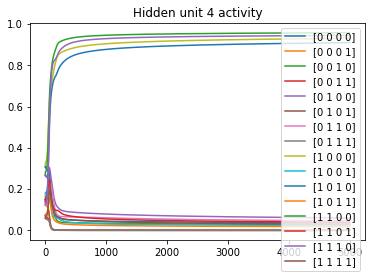

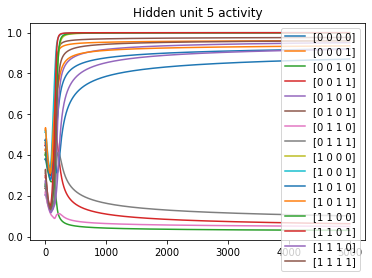

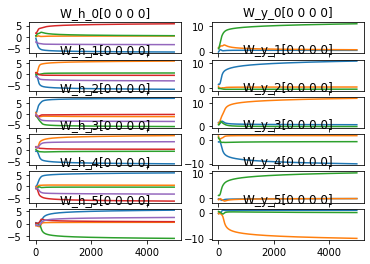

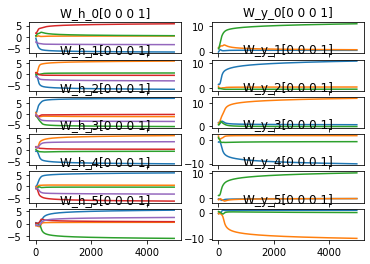

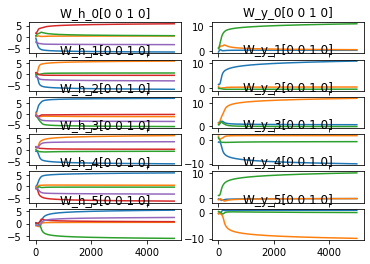

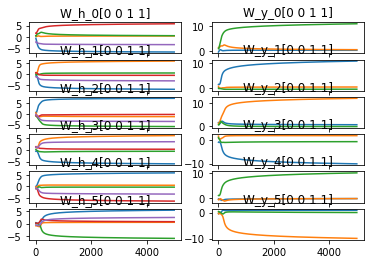

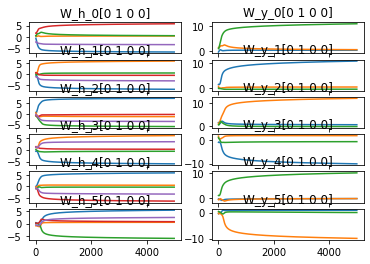

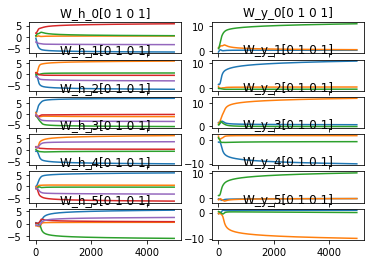

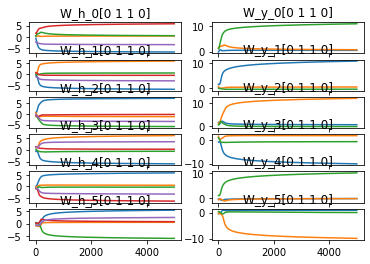

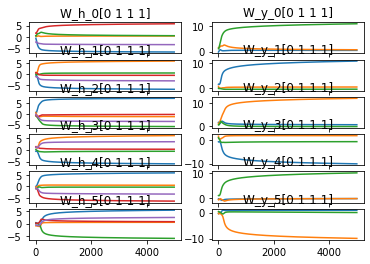

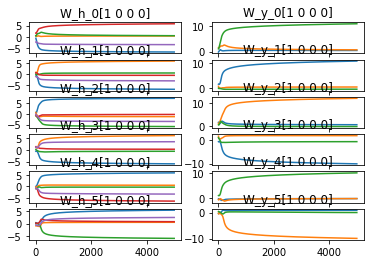

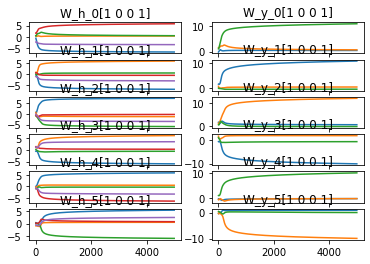

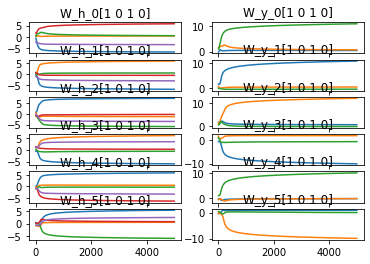

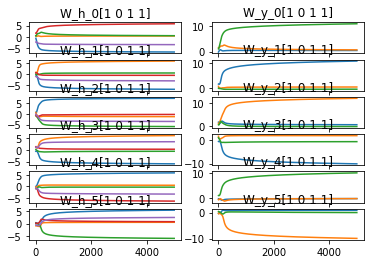

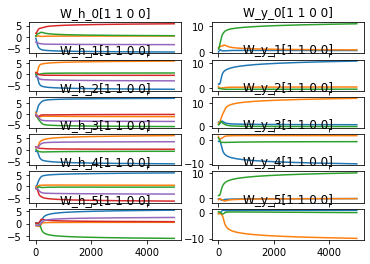

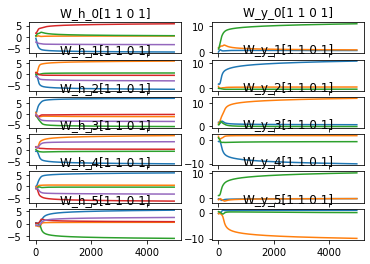

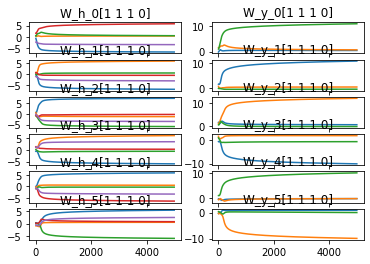

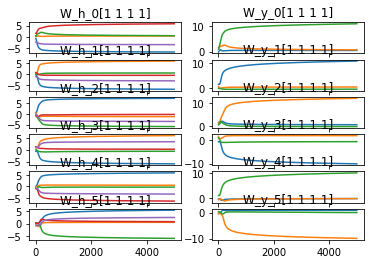

In [ ]:
negmlp.plot_activity()
negmlp.plot_weights()